In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("citrus.csv") 
data = data[:6000]

In [3]:
data["name"]=data["name"].map({"orange": 1, "grapefruit": 0})
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      6000 non-null   int64  
 1   diameter  6000 non-null   float64
 2   weight    6000 non-null   float64
 3   red       6000 non-null   int64  
 4   green     6000 non-null   int64  
 5   blue      6000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 281.4 KB


,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9
...,...,...,...,...,...,...
5995,0,10.44,180.92,158,69,34
5996,0,10.44,180.93,156,72,24
5997,0,10.44,180.94,147,70,16
5998,0,10.44,180.95,158,68,3


In [4]:
y = data["name"].astype("int")
x = data.drop("name", axis=1)

In [5]:
print("\nРазмерность x.shape, y.shape")
print(x.shape, y.shape)



Размерность x.shape, y.shape
(6000, 5) (6000,)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
    # разбиваем выборку на тестовую и отложенную (30%)
    # Паоаметр random_state используется в качестве начального значения для генератора чисел random.
    # Это гарантирует, что наборы данных train и test не будут изменяться при каждом новом выполнении кода.
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=10)     
print("\nРазмерность X_train.shape, X_valid.shape")
print(X_train.shape, X_valid.shape)

print("\nРазмерность y_train.shape, y_valid.shape")
print(y_train.shape, y_valid.shape)


Размерность X_train.shape, X_valid.shape
(4200, 5) (1800, 5)

Размерность y_train.shape, y_valid.shape
(4200,) (1800,)


In [7]:
print("\nДерево решений")
    # Строим  дерево
first_tree = DecisionTreeClassifier(random_state=10)
first_tree = first_tree.fit(X_train,y_train) 
    # оценка модели с помощью кросс-валидации
print(cross_val_score(first_tree, X_valid, y_valid, cv=5))
    # среднее по пяти оценкам
tree_first_result = np.mean(cross_val_score(first_tree, X_valid, y_valid, cv=5))
print(tree_first_result)


Дерево решений
[0.89166667 0.91388889 0.93333333 0.91388889 0.925     ]
0.9155555555555555


[Text(225.02917867435158, 530.01, 'X[0] <= 9.315\ngini = 0.281\nsamples = 4200\nvalue = [710, 3490]'),
 Text(77.38832853025937, 502.83000000000004, 'X[4] <= 20.5\ngini = 0.091\nsamples = 2764\nvalue = [132, 2632]'),
 Text(34.97550432276657, 475.65000000000003, 'X[3] <= 51.5\ngini = 0.065\nsamples = 2606\nvalue = [87, 2519]'),
 Text(31.759365994236312, 448.47, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(38.19164265129683, 448.47, 'X[0] <= 8.805\ngini = 0.06\nsamples = 2600\nvalue = [81, 2519]'),
 Text(18.492795389048993, 421.29, 'X[3] <= 58.5\ngini = 0.018\nsamples = 2030\nvalue = [18, 2012]'),
 Text(6.432276657060519, 394.11, 'X[0] <= 8.55\ngini = 0.227\nsamples = 23\nvalue = [3, 20]'),
 Text(3.2161383285302594, 366.93000000000006, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(9.648414985590778, 366.93000000000006, 'X[1] <= 154.925\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(6.432276657060519, 339.75, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(12.8645533141210

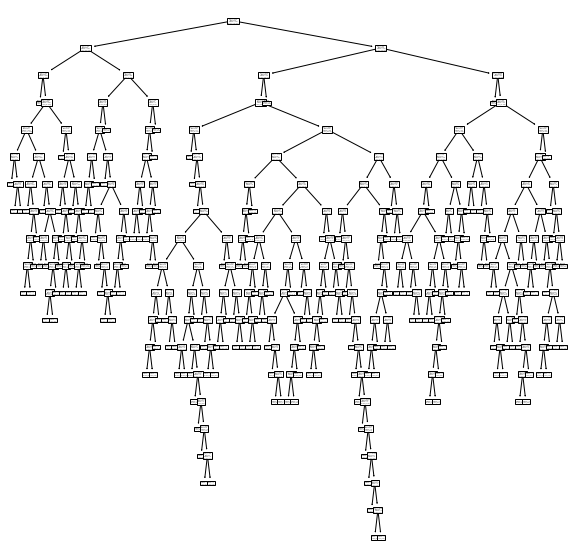

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(first_tree)

In [9]:
print("\nМетод k ближайших соседей")
    # метод k ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
    # строим первую оценку
first_knn = KNeighborsClassifier()
    # оценка модели с помощью кросс-валидации
print(cross_val_score(first_knn, X_train.values, y_train.values, cv=5))
    # среднее по пяти оценкам
knn_first_result = np.mean(cross_val_score(first_knn, X_train.values, y_train.values, cv=5))
print(knn_first_result)



Метод k ближайших соседей
[0.90119048 0.90833333 0.89880952 0.89166667 0.88809524]
0.8976190476190476


In [10]:
# SVC method 
print("\n Метод SVC")
#split dataset in features and target variable
feature_cols = ['diameter', 'weight', 'red', 'green','blue']
X = data[feature_cols] # Features
y = data.name # Target variable


 Метод SVC


In [11]:
# split X and y into training and testing sets
from sklearn.model_selection import cross_val_score, train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [12]:
# import the class
from sklearn.svm import SVC

# instantiate the model (using the default parameters)
model_SVC = SVC(kernel='linear',C=1)

# fit the model with data
model_SVC.fit(X_train,y_train)

model_SVC.score(X_train, y_train)

0.9635555555555556

In [13]:
# calculate the predicted values
y_pred=model_SVC.predict(X_test)

In [14]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 214,   24],
       [  31, 1231]], dtype=int64)

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9633333333333334
Precision: 0.9808764940239044
Recall: 0.9754358161648178


In [16]:
data

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9
...,...,...,...,...,...,...
5995,0,10.44,180.92,158,69,34
5996,0,10.44,180.93,156,72,24
5997,0,10.44,180.94,147,70,16
5998,0,10.44,180.95,158,68,3


In [17]:
print("\nУлучшаем модель DT. Настраиваем max_depth для дерева")
    # Улучшаем модель DT. Настраиваем max_depth для дерева
from sklearn.model_selection import GridSearchCV
    # Устанавливаем параметры дерева
tree_params = {"max_depth": np.arange(1, 11), "max_features": [1, 3, 5]}
    # GridSearchCV оптимизация путем перекрестного поиска по сетке параметров:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)
    
    # Выполняем прогонку со всеми наборами параметров 
tree_grid.fit(X_train, y_train)
    # Выводим лучшие параметры для оптимизации
print("Лучшие параметры для оптимизации")
print(tree_grid.best_score_, tree_grid.best_params_)



Улучшаем модель DT. Настраиваем max_depth для дерева
Лучшие параметры для оптимизации
0.9306666666666666 {'max_depth': 10, 'max_features': 3}


In [18]:
print("\nУлучшаем модель knn")
    # Улучшаем модель knn
    # заполняем предлагаемые параметры
knn_params = {"n_neighbors": range(5, 30, 5)} 
    # производим оценку параметров
knn_grid = GridSearchCV(first_knn, knn_params, cv=5)
    # Выводим затраченное время
%time
    # Выполняем прогонку со всеми наборами параметров 
knn_grid.fit(X_train.values, y_train.values);
    # Выводим лучшие параметры для оптимизации
print("Лучшие параметры для оптимизации")
print(knn_grid.best_score_, knn_grid.best_params_)


Улучшаем модель knn
Wall time: 0 ns
Лучшие параметры для оптимизации
0.9104444444444443 {'n_neighbors': 15}



Улучшаем модель SVC. Редактируем параметры гамма и C, проводим нормализацию 


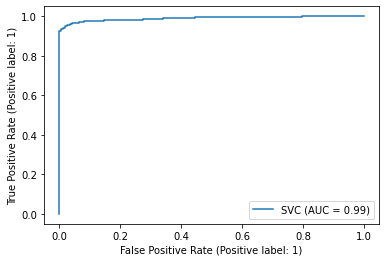

In [20]:
print("\nУлучшаем модель SVC. Редактируем параметры гамма и C, проводим нормализацию ")
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(model_SVC, X_test, y_test)

In [21]:
from sklearn.model_selection import GridSearchCV
SVC_params = {"C": [0.5, 1], "gamma": [0.2,0.6, 1]}
SVC_grid = GridSearchCV(model_SVC, SVC_params, cv=5, n_jobs=-1)

In [22]:
 %%time
SVC_grid.fit(X_train, y_train);

Wall time: 7.05 s


GridSearchCV(cv=5, estimator=SVC(C=1, kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.5, 1], 'gamma': [0.2, 0.6, 1]})

In [23]:
from sklearn import preprocessing
d = preprocessing.normalize(X, axis=0)
X_norm = pd.DataFrame(d, columns=feature_cols)
X_norm.head()
# y не нормаизуем (0,1)

,diameter,weight,red,green,blue
0,0.004351,0.007142,0.014220,0.013597,0.002264
1,0.005747,0.007248,0.013724,0.012477,0.003396
2,0.006497,0.007835,0.012897,0.012957,0.002264
3,0.006570,0.007870,0.013476,0.012957,0.004528
4,0.006585,0.007883,0.013310,0.011517,0.010189


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.25,random_state=0)

In [25]:
y_train.head()

1824    1
253     1
1114    1
3220    1
2108    1
Name: name, dtype: int64

In [26]:
X_train.head()

,diameter,weight,red,green,blue
1824,0.011847,0.012054,0.012566,0.011357,0.007925
253,0.009422,0.010039,0.013889,0.013757,0.002264
1114,0.011068,0.011414,0.013889,0.014716,0.002264
3220,0.013126,0.013148,0.012070,0.013117,0.018113
2108,0.012112,0.012269,0.013889,0.012637,0.009057


In [27]:
print("\nРезультат:")
# instantiate the model (using the default parameters)

model_SVC_norm = SVC(kernel='linear')

# fit the model with data
model_SVC_norm.fit(X_train,y_train)

model_SVC_norm.score(X_train, y_train)


Результат:


0.8306666666666667

In [28]:
print("\nВЫВОД В данном примере лучшие результаты показала модель:")
print("До настройки: ", 
      ( "дерево" if tree_first_result > knn_first_result else "оба метода" if tree_first_result == knn_first_result else  "метод ближайших соседей" ),
      ", с точностью -",
      ( tree_first_result if tree_first_result > knn_first_result else tree_first_result if tree_first_result == knn_first_result else knn_first_result ) )
print("После настройки - ", ( "дерево" if tree_grid.best_score_ > knn_grid.best_score_ else "оба метода" if tree_grid.best_score_ == knn_grid.best_score_ else "метод ближайших соседей" ),
      ", с точностью -",
      ( tree_grid.best_score_ if tree_grid.best_score_ > knn_grid.best_score_ else tree_grid.best_score_ if tree_grid.best_score_ == knn_grid.best_score_ else knn_grid.best_score_ ))


ВЫВОД В данном примере лучшие результаты показала модель:
До настройки:  дерево , с точностью - 0.9155555555555555
После настройки -  дерево , с точностью - 0.9306666666666666


In [29]:

    # Рассчитаем оценку модели DT на отложенной выборке
    # прогноз на отложенной выборке
tree_valid_pred = tree_grid.predict(X_valid) 
    # первые 50 спрогнозированых меток
print("первые 50 спрогнозированых меток")
print(tree_valid_pred[0:50])
    # Доля верных ответов в прогнозах
from sklearn.metrics import accuracy_score
print("Доля верных ответов в прогнозах")
print(accuracy_score(y_valid, tree_valid_pred))
 

первые 50 спрогнозированых меток
[1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Доля верных ответов в прогнозах
0.9666666666666667


In [57]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
data = pd.read_csv("citrus.csv")

In [56]:
X, y = data(return_X_y=True)
y = y == 2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

TypeError: 'DataFrame' object is not callable

In [53]:
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

NameError: name 'svc' is not defined

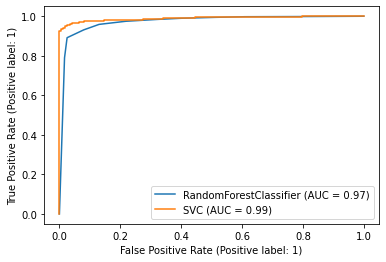

In [54]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax)
svc_disp.plot(ax=ax)
plt.show()